## Project Description
Halo, saya Hansen Kallista dan pada Final Project 1 ini, saya menggunakan kasus sebuah perusahaan di Amerika yang bergerak di bidang tranportasi online. Menggunakan Uber and Lyft Dataset Boston dengan besar 693071 baris dan 57 kolom. Pada project ini saya harap saya bisa menerapkan regresi linear pada dataset.

### Melakukan Persiapan Awal dan Import Library yang Diperlukan

In [6]:
# Library untuk melaukan proses data
import pandas as pd
import numpy as np

# Library untuk melakukan visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk melakukan Modeling dan Training data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## Membaca Dataset Dan Memasukkan Dataset ke Data Frame (Data Loading)

In [7]:
# Membuat dataframe untuk menyimpan dataset
df_rideshare = pd.read_csv('dataset/rideshare_kaggle.csv')

# Menampilkan data 10 teratas dalam dataset
df_rideshare.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
9,8612d909-98b8-4454-a093-30bd48de0cb3,1.543316e+09,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000


## Melakukan Pengecekan Missing Values

In [8]:
df_rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
df_rideshare.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Berdasarkan pengecekan diatas terdapat missing value pada kolom price. Sebelum melanjutkan ke tahap berikutnya kita perlu mengatasi missing value tersebut. Karena missing value yang ada terlalu banyak, kita tidak bisa melakukan drop, maka dari itu kita dapat mengisi missing value tersebut dengan rata-rata (mean).

In [10]:
# Mengisi missing value dengan nilai rata-rata pada kolom price
df_rideshare['price'].fillna(int(df_rideshare['price'].mean()), inplace = True)

In [11]:
df_rideshare.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Melakukan Drop pada Kolom yang Tidak Diperukan

In [12]:
# Mealkukan drop pada kolom id, timestamp, datetime dan, timezone
df_rideshare = df_rideshare.drop(['id', 'timestamp','datetime','timezone'], axis=1)

In [13]:
# Melihat hasil dataframe setelah dilakukan drop
df_rideshare.head(5)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Visualisasi Data

#### Melihat Frekuensi Tipe Cab yang digunakan

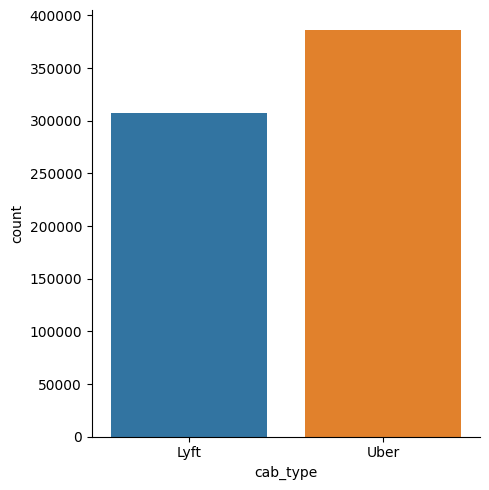

In [14]:
# Membuat Visualisasi menggunakan seaborn
sns.catplot(
    data = df_rideshare,
    kind = 'count',
    x = 'cab_type',
    )

Berdasarkan visualisasi diatas, bisa kita simpulkan bahwa penggunaan layanan Uber hampir menyentuh angka 400K, sedangkan pengguna layanan Lyft yang lebih sedikit.

#### Melihat Frekuensi Tujuan (Destinasi) dari Keseluruhan Pengguna Layanan

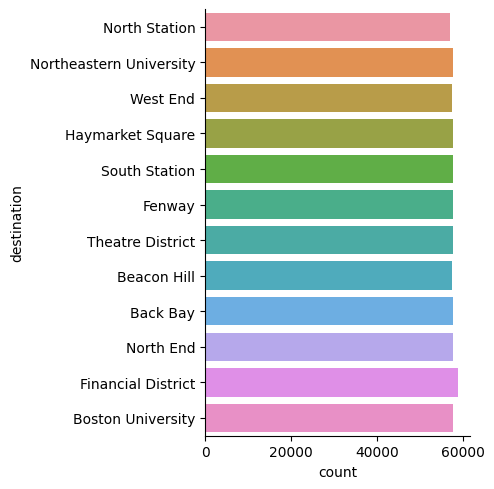

In [15]:
# Membuat Visualisasi menggunakan seaborn
sns.catplot(
    data = df_rideshare,
    kind = 'count',
    y = 'destination',
    )

Berdasarkan Visualisasi diatas dapat dilihat bahwa Financial District menjadi destinasi yang paling banyak dituju oleh pengguna layanan, namun dari seluruh tujuan (destinasi) yang tertera pada diagram hampir sama dengan jumlah yang hampir menyentuh 60K.

## Melakukan Data Pre-processing

### Drop Kolom yang Tidak Digunakan

In [16]:
# Melakukan drop pada kolom yang tidak digunakan
df_rideshare_test= df_rideshare.drop(['source', 'destination', 'short_summary', 'icon',
                                      'hour', 'day', 'month', 'latitude', 'longitude'], axis=1)

df_rideshare_test.head(5)

,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,long_summary,precipIntensity,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.34,37.12,Rain throughout the day.,0.0000,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,Lyft,lyft_premier,Lux,11.0,0.44,1.0,43.58,37.35,"Rain until morning, starting again in the eve...",0.1299,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,Lyft,lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Light rain in the morning.,0.0000,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Partly cloudy throughout the day.,0.0000,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,37.44,30.88,Mostly cloudy throughout the day.,0.0000,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Melakukan Encoding

In [17]:
# Encoding menggunakan OneHotEncoder, untuk encode kategori fitur menjadi one-hot numerik array
# Membuat fungsi OneHotEncoder
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])

    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)

    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)

    if keep_first == False:
        new_data=new_data.iloc[:,1:]

    return new_data

In [18]:
# Membuat data
df_onehot = df_rideshare_test.copy()

for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)

df_onehot.head()

,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,...,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening."
0,5.0,0.44,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,...,0,0,0,0,0,0,0,0,1,0
1,11.0,0.44,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,...,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,...,0,1,0,0,0,0,0,0,0,0
3,26.0,0.44,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,...,0,0,0,0,0,1,0,0,0,0
4,9.0,0.44,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,...,0,0,0,1,0,0,0,0,0,0


## Melakukan Data Split dan Training Data

In [19]:
X = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Inisiasi Regresi Linear
reg = LinearRegression()

In [21]:
## Fitting data dan training data
model = reg.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
# Melihat score akurasi menggunakan algoritma Regresi Linear
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9179031825300852

Berdasarkan skor akurasi diatas, bisa dilihat bahwa regresi linear memiliki skor akurasi sebesar 91.79%, menunjukkan bahwa algoritma regresi linear merupakan algoritma yang cocok untuk diterapkan pada dataset Uber And Lyft ini.

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.588419774526375
2.5667917279215264


### Kesimpulan Akhir
Setelah melakukan proses training data diatas, dapat disimpulkan bahwa menggunakan algoritma regresi linear pada Uber and Lyft Boston Dataset dengan tingkat akurasi melebihi 90% sudah menjadi keputusan yang tepat. Karena algoritma regresi linear yang bekerja untuk memperkirakan hubungan antara dua variabel kuantitatif.